## Imports

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset

## Load data

In [188]:
# phenotypes
phen_df = pd.read_csv("data/all_phenotypes.tsv", sep="\t", header=0)
# static features
static_df = pd.read_csv("data/static_features.tsv", sep="\t", header=0)
static_df.sort_values(by="participant_id",ascending=True,inplace=True)
phen_df.sort_values(by="participant_id",ascending=True,inplace=True)

## Create labels

In [189]:
phen_df

,participant_id,redcap_repeat_instrument,redcap_repeat_instance,selected_language,age,is_control_participant,laryng_cancer,benign_cord_lesion,rrp,spas_dys,...,vocabulary_item_word_6,vocabulary_item_difficulty_6,random_session_id,random_recording_acoustic_task_id,random_duration,random_item_generation_category,Voice Disorders,Neurological and Neurodegenerative Disorders,Mood and Psychiatric Disorders,Respiratory Disorders
0,004d42e9,Participant,1.0,English,75.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,affirmation,3.0,07031CC3,A91D679E-201E-49AF-AD3D-D988836B3BCC,83.0,English words starting with 't',False,True,True,False
1,01401050,Participant,1.0,English,74.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,surreal,3.0,09E64686,AAC88E40-7F5C-40D6-BA68-93A01923E467,192.0,Letters,False,True,True,False
2,016023f6,Participant,1.0,English,78.0,No,Unchecked,Unchecked,Unchecked,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
3,02624589,Participant,1.0,English,82.0,No,Unchecked,Unchecked,Unchecked,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
4,02955d67,Participant,1.0,English,76.0,Yes,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,fc603d45,Participant,1.0,English,81.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,compartmentalize,3.0,CD772E40,A8ABD411-49FB-4FAE-8E58-445A1A3BE711,64.0,Animals,False,True,False,False
438,fc61a1ff,Participant,1.0,English,72.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True
439,fe6cefa7,Participant,1.0,English,50.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True
440,ff58dff0,Participant,1.0,English,21.0,Yes,Unchecked,Unchecked,Unchecked,Unchecked,...,aquaplane,3.0,A5484A20,0598F4BC-52E6-4302-8EF7-F3C9AA6097DE,50.0,Numbers,True,True,True,True


In [190]:
phen_df["Voice Disorders"].value_counts()

Voice Disorders
True     230
False    212
Name: count, dtype: int64

In [191]:
static_df["Voice Disorders"] = [int(phen_df[phen_df["participant_id"] == row.participant_id]["Voice Disorders"].tolist()[0]) for idx,row in static_df.iterrows()]

In [192]:
static_df

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,local_shimmer,localDB_shimmer,apq3_shimmer,apq5_shimmer,apq11_shimmer,dda_shimmer,stoi,pesq,si_sdr,Voice Disorders
0,004d42e9,07031CC3,Animal-fluency,"Dogs, cats, lions, panthers, leopards, elephan...",30.849073,0.205649,26.938833,32.299248,36.319099,9.380266,...,0.140185,1.279872,0.062109,0.065476,0.063903,0.186326,0.594471,1.159233,-14.364435,0
26,004d42e9,07031CC3,Productive-Vocabulary-1,broccoli broccoli is a green vegetable and hea...,34.447186,0.057132,32.960548,33.506256,36.057877,3.097328,...,0.081463,0.909085,0.037340,0.037903,0.054074,0.112019,0.802794,1.277508,-0.301972,0
27,004d42e9,07031CC3,Productive-Vocabulary-2,"Capitalization. Hmm. Could be, um, when you're...",35.895359,0.092448,33.253757,35.642937,37.830379,4.576622,...,0.105887,1.090807,0.052075,0.067322,0.076049,0.156226,0.742845,1.199748,-1.893810,0
28,004d42e9,07031CC3,Productive-Vocabulary-3,Unsuitable. Not correct. Or... I said not corr...,35.248405,0.101374,33.987968,36.224056,37.653236,3.665268,...,0.111295,1.158668,0.050776,0.061889,0.081749,0.152328,0.705393,1.185849,-3.215629,0
29,004d42e9,07031CC3,Productive-Vocabulary-4,Minority. Minority is the lesser group.,33.798946,0.114689,32.843185,34.022396,36.028976,3.185791,...,0.119717,1.170932,0.056202,0.063807,0.061901,0.168605,0.818446,1.240876,-1.725452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,ff75b163,6A3E7090,Diadochokinesis-TA,Ta ta ta ta ta ta ta ta ta ta ta,26.530842,0.038758,25.860199,26.675362,27.344505,1.484306,...,0.093277,0.994439,0.029967,0.051134,0.088584,0.089901,0.993067,3.620620,25.058619,1
19246,ff75b163,6A3E7090,Diadochokinesis-buttercup,"Markup, markup, markup, markup, markup, markup...",27.925495,0.054326,27.288794,28.198372,28.900181,1.611387,...,0.172056,1.558691,0.075453,0.125921,0.179042,0.226358,0.943791,2.379631,17.349405,1
19247,ff75b163,6A3E7090,Free-Speech,I came to the physician because I had a feelin...,25.366678,0.090976,23.924431,25.256680,26.426678,2.502247,...,0.099615,1.020855,0.036914,0.055092,0.096946,0.110742,0.898831,1.960933,12.243779,1
19249,ff75b163,6A3E7090,Free-speech-2,NaN,26.703327,0.166226,24.957359,26.008017,27.915869,2.958509,...,0.122538,1.161885,0.044590,0.064484,0.138375,0.133770,0.869760,1.683203,6.723745,1


In [193]:
y = static_df["Voice Disorders"].copy()
X = static_df.copy().drop(columns=["participant_id", "session_id","task_name","transcription","Voice Disorders"])
print(X.shape, y.shape)

(19271, 131) (19271,)


## Calculate group numbers

In [194]:
# calculate group numbers
all_groups = np.array(static_df["participant_id"].tolist())
uniq_groups = static_df["participant_id"].unique()
static_df["participant_id_int"] = [np.where(uniq_groups==row.participant_id)[0][0] for idx,row in static_df.iterrows()]
static_df[["participant_id_int","participant_id"]]

,participant_id_int,participant_id
0,0,004d42e9
26,0,004d42e9
27,0,004d42e9
28,0,004d42e9
29,0,004d42e9
...,...,...
19245,441,ff75b163
19246,441,ff75b163
19247,441,ff75b163
19249,441,ff75b163


In [195]:
groups = static_df["participant_id_int"].copy()
groups

0          0
26         0
27         0
28         0
29         0
        ... 
19245    441
19246    441
19247    441
19249    441
19270    441
Name: participant_id_int, Length: 19271, dtype: int64

## Drop NaNs

#### Drop columns with NaNs over some threshold

In [196]:
# drop nans
nans = X.isna().sum()
thresh_nans = nans[nans>50]
print(len(thresh_nans))

35


In [197]:
thresh_nans

speaking_rate                      83
articulation_rate                  83
phonation_ratio                    83
pause_rate                         83
mean_pause_duration                83
mean_f0_hertz                     443
std_f0_hertz                      522
mean_hnr_db                        79
spectral_slope                    538
spectral_tilt                     538
cepstral_peak_prominence_mean     751
cepstral_peak_prominence_std      751
mean_f1_loc                       166
std_f1_loc                        166
mean_b1_loc                       166
std_b1_loc                        166
mean_f2_loc                       166
std_f2_loc                        166
mean_b2_loc                       166
std_b2_loc                        166
spectral_gravity                  453
spectral_std_dev                  453
spectral_skewness                 453
spectral_kurtosis                 453
local_jitter                      538
localabsolute_jitter              538
rap_jitter  

In [198]:
X.drop(columns=thresh_nans.index,inplace=True)
print(X.shape)

(19271, 96)


#### Drop rows with NaNs under threshold

In [199]:
nans = X.isna().sum()
nans[nans>0]

std_intensity_db     2
std_hnr_db          14
stoi                17
pesq                17
si_sdr              17
dtype: int64

In [200]:
# drop rows
inds_to_drop = []
inds_to_drop.extend(X[X["std_intensity_db"].isna()].index)
inds_to_drop.extend(X[X["std_hnr_db"].isna()].index)
inds_to_drop.extend(X[X["stoi"].isna()].index)
inds_to_drop.extend(X[X["pesq"].isna()].index)
inds_to_drop.extend(X[X["si_sdr"].isna()].index)
print(len(inds_to_drop))


67


In [201]:
X.drop(index=inds_to_drop,inplace=True)
y.drop(index=inds_to_drop,inplace=True)
groups.drop(index=inds_to_drop,inplace=True)
print(X.shape, y.shape, groups.shape)

(19238, 96) (19238,) (19238,)


In [202]:
X = X.to_numpy()
y = y.to_numpy()
groups = groups.to_numpy()
print(X.shape, y.shape, groups.shape)

(19238, 96) (19238,) (19238,)


In [206]:
X

array([[ 30.84907341,   0.20564899,  26.93883324, ...,   0.59447134,
          1.15923345, -14.3644352 ],
       [ 34.44718552,   0.05713191,  32.9605484 , ...,   0.80279362,
          1.27750802,  -0.30197161],
       [ 35.89535904,   0.09244755,  33.25375748, ...,   0.74284542,
          1.19974804,  -1.89381027],
       ...,
       [ 25.36667824,   0.09097601,  23.92443085, ...,   0.89883059,
          1.96093297,  12.24377918],
       [ 26.70332718,   0.16622576,  24.95735931, ...,   0.86976027,
          1.68320274,   6.72374535],
       [ 25.70492172,   0.10263921,  24.73193359, ...,   0.77100056,
          1.54447126,   5.90256643]], shape=(19238, 96))

## Normalization

In [207]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_proc = ss.fit_transform(X)
X_proc

array([[ 0.35671517,  1.22982296,  0.23126498, ..., -0.81043146,
        -0.9498115 , -1.11640847],
       [ 0.6293551 , -0.40929   ,  0.71729659, ...,  0.09812876,
        -0.83189516, -0.21137239],
       [ 0.73908762, -0.01952797,  0.74096242, ..., -0.16332457,
        -0.90941962, -0.3138204 ],
       ...,
       [-0.05870263, -0.03576868, -0.01203694, ...,  0.51697675,
        -0.15054014,  0.59605065],
       [ 0.04257933,  0.79472738,  0.07133398, ...,  0.39019178,
        -0.42742919,  0.24079072],
       [-0.03307289,  0.09295254,  0.05313916, ..., -0.04053095,
        -0.56574048,  0.18794105]], shape=(19238, 96))

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_proc)

tsne = TSNE()
X_tsne = tsne.fit_transform(X_proc)

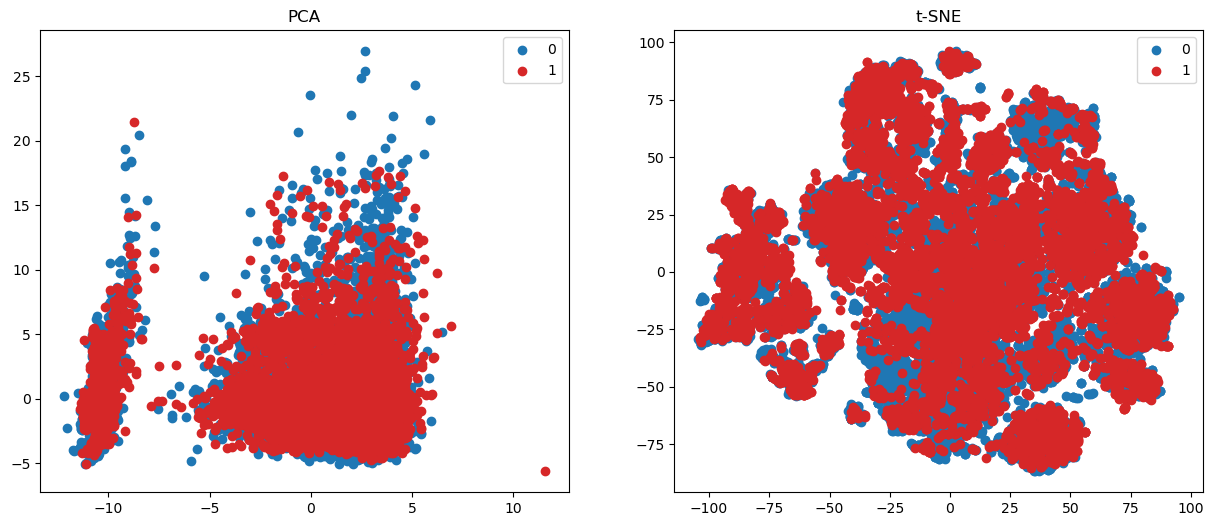

In [169]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

## Let's try averaging over sessions for each subject

In [232]:
X_ave = np.zeros((groups[-1]+1, X.shape[1]))
y_ave = np.zeros(groups[-1]+1)
for g in np.arange(groups[-1]+1):
    curr_X = X_proc[np.where(groups==g)].mean(axis=0)
    X_ave[g] = curr_X
    y_ave[g] = y[np.where(groups==g)].mean()
print(X_ave.shape)

(442, 96)


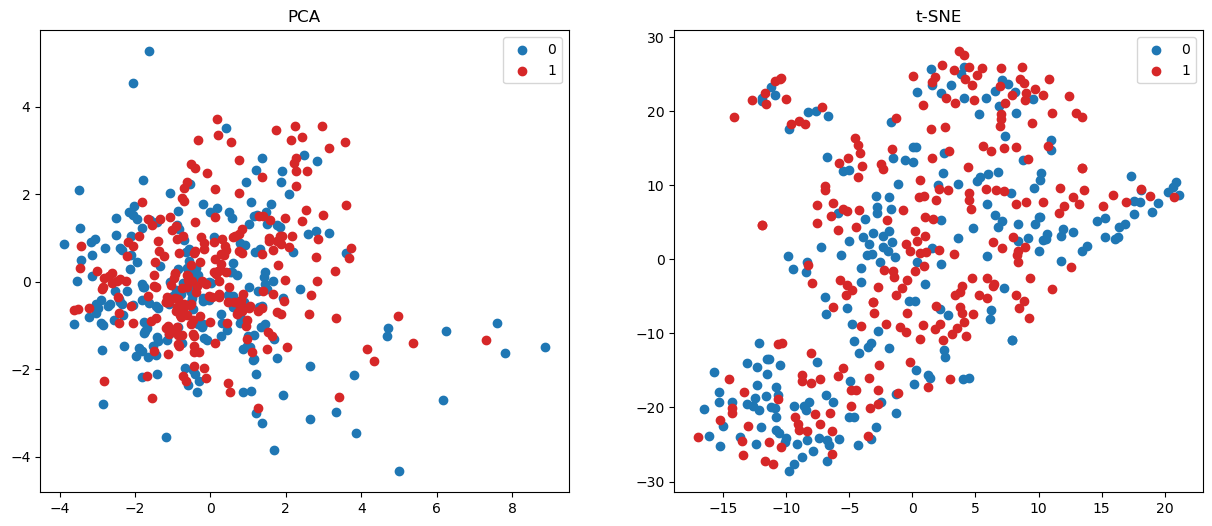

In [235]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_ave)

tsne = TSNE()
X_tsne = tsne.fit_transform(X_ave)

fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y_ave==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

## Try out some models

In [240]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results = {name: {'accuracies': [], 'f1_scores': []} 
          for name in models.keys()}

# Perform K-Fold CV for each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    for train_idx, test_idx in kf.split(X_ave):
        X_train, X_test = X_ave[train_idx], X_ave[test_idx]
        y_train, y_test = y_ave[train_idx], y_ave[test_idx]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        results[name]['accuracies'].append(accuracy_score(y_test, y_pred))
        results[name]['f1_scores'].append(f1_score(y_test, y_pred))


Training Logistic Regression...

Training SVM...

Training Random Forest...



Model Performance Summary:
--------------------------------------------------------------------------------
Model                Accuracy        F1-Score       
--------------------------------------------------------------------------------
Logistic Regression  0.774           0.784          
SVM                  0.765           0.772          
Random Forest        0.735           0.735          


/var/folders/pr/0jl9zy5j5nvcs0ycl3xdjjmm0000gn/T/ipykernel_41649/4227191779.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=models.keys())
/var/folders/pr/0jl9zy5j5nvcs0ycl3xdjjmm0000gn/T/ipykernel_41649/4227191779.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=models.keys())


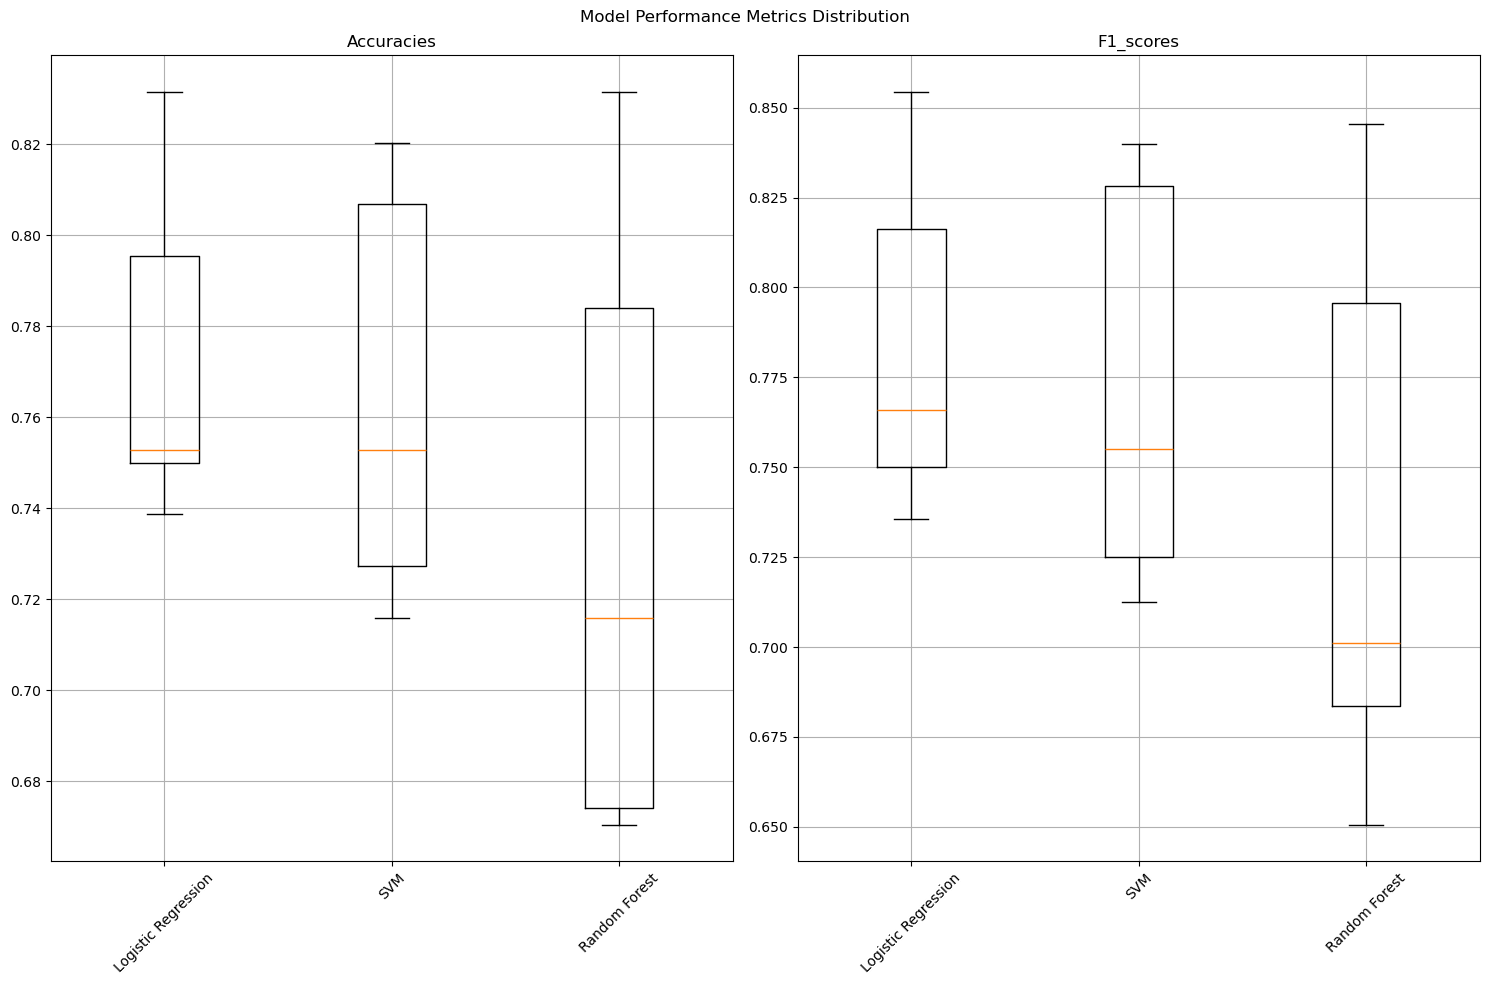

In [241]:
# Calculate and display mean metrics for each model
print("\nModel Performance Summary:")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<15} {'F1-Score':<15}")
print("-" * 80)

for name in models.keys():
    mean_acc = np.mean(results[name]['accuracies'])
    mean_f1 = np.mean(results[name]['f1_scores'])
    
    print(f"{name:<20} {mean_acc:<15.3f} {mean_f1:<15.3f}")

# Create box plots to visualize the distribution of scores
metrics = ['accuracies', 'f1_scores']
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Model Performance Metrics Distribution')

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    data = [results[name][metric] for name in models.keys()]
    ax.boxplot(data, labels=models.keys())
    ax.set_title(metric.capitalize())
    ax.set_xticklabels(models.keys(), rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

## Visualize Decision Boundary

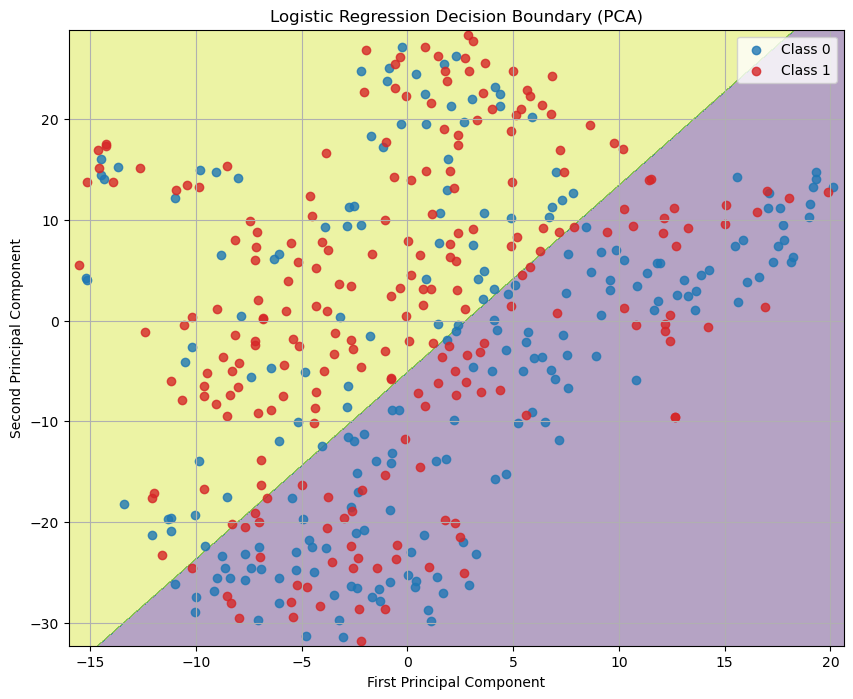

Accuracy on 2D PCA projection: 0.636


In [245]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_ave)

# Train logistic regression on t-SNE transformed data
lr = LogisticRegression(random_state=42)
lr.fit(X_tsne, y_ave)

# Create a mesh grid to plot decision boundary
x_min, x_max = X_tsne[:, 0].min() - 0.5, X_tsne[:, 0].max() + 0.5
y_min, y_max = X_tsne[:, 1].min() - 0.5, X_tsne[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get predictions for each point in the mesh
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot class samples
for val, c in zip([0, 1], ["tab:blue", "tab:red"]):
    inds = np.where(y_ave == val)
    plt.scatter(X_tsne[inds, 0], X_tsne[inds, 1], c=c, 
                label=f"Class {val}", alpha=0.8)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Logistic Regression Decision Boundary (PCA)")
plt.legend()
plt.grid(True)
plt.show()

# Print accuracy on this 2D projection
print(f"Accuracy on 2D PCA projection: {accuracy_score(y_ave, lr.predict(X_tsne)):.3f}")